<a href="https://colab.research.google.com/github/abhi1628/R_Programming/blob/main/R_from_scratch_day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Question:** Performing Logistic Regression Analysis in R
You have been given a dataset containing information about various car models, including their weight and fuel efficiency (measured in miles per gallon, MPG). You are required to perform a logistic regression analysis to understand the relationship between the weight of the car (wt) and whether it has high fuel efficiency (high_mpg). Follow the steps below to complete this task in R.

1. Load and Explore the Data:
- Load the mtcars dataset from the datasets package.
- Display the first few rows and summary statistics of the dataset.

2. Create a Binary Response Variable:
- Create a new binary variable high_mpg which is 1 if mpg is greater than 20, and 0 otherwise.
- Add this new variable to the mtcars dataset.

3. Visualize the Data:
- Create a scatter plot of high_mpg against wt to visualize the relationship.

4. Fit a Logistic Regression Model:
- Fit a logistic regression model with high_mpg as the response variable and wt as the predictor.
- Display a summary of the logistic model, which includes coefficients, p-values, and other relevant statistics.

5. Model Interpretation:
- Extract and print the coefficients of the logistic regression model.
- Predict the probability of having high MPG for a new weight value (e.g., 3.5) using the fitted model and print the predicted probability.

6. Model Diagnostics:
- Plot the fitted values against the actual values to check the model fit.

Write the R script to perform the above tasks.

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,high_mpg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,1
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,1
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,0
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,0



Call:
glm(formula = high_mpg ~ wt, family = binomial, data = mtcars)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   19.950      8.336   2.393   0.0167 *
wt            -6.391      2.584  -2.473   0.0134 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.86  on 31  degrees of freedom
Residual deviance: 13.73  on 30  degrees of freedom
AIC: 17.73

Number of Fisher Scoring iterations: 7


Intercept: 19.94958 
Slope: -6.39054 
Predicted probability of high MPG for weight 3.5: 0.08186231 


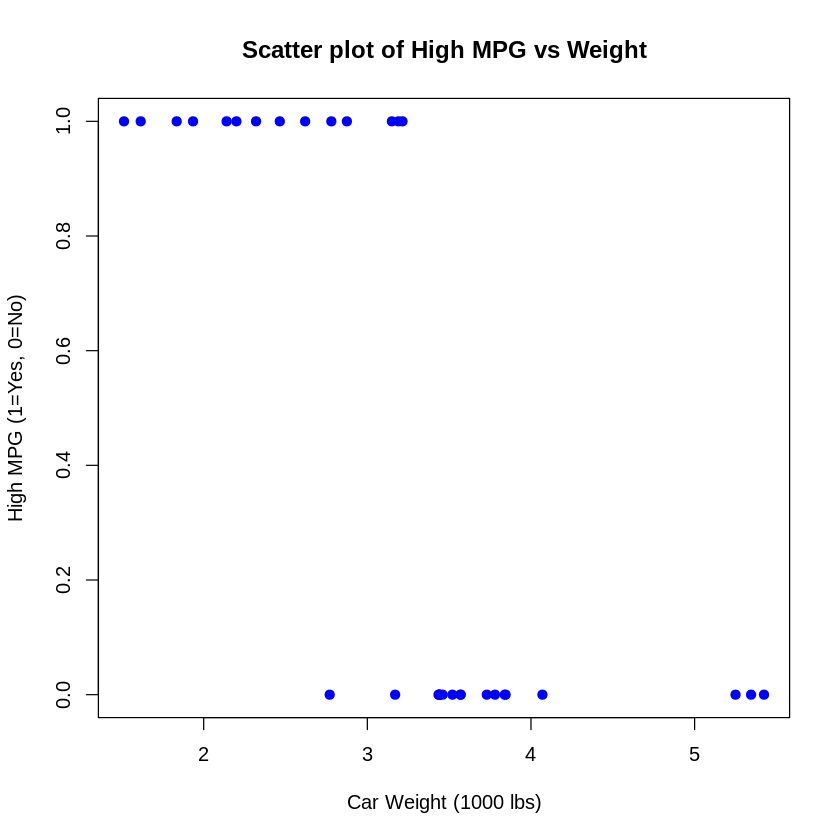

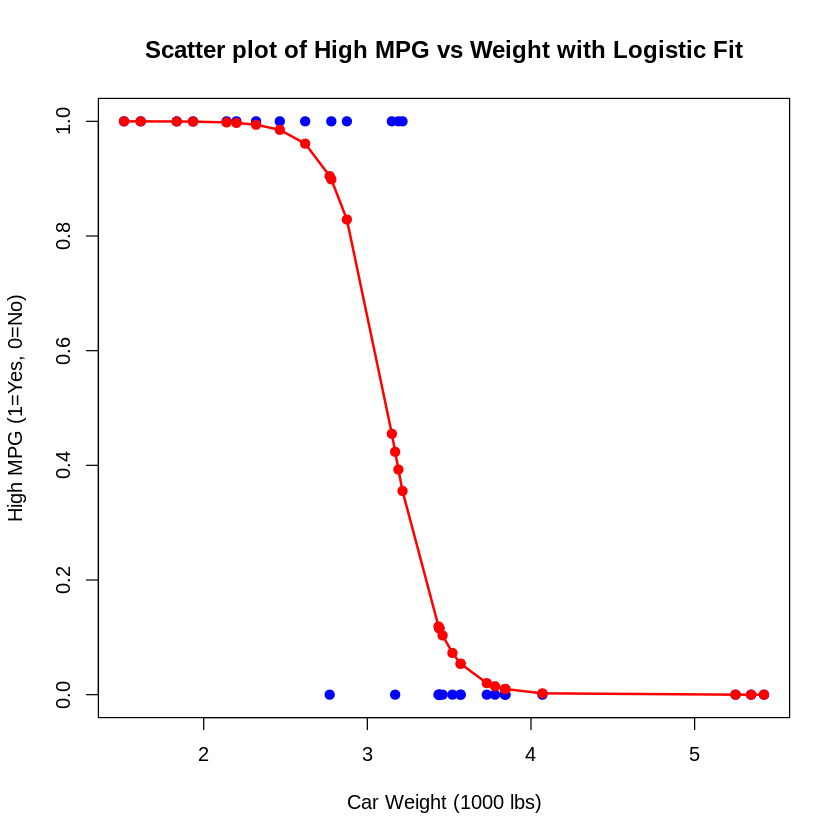

In [1]:
# Load necessary library
# The `datasets` package is usually preloaded, but we include it here for completeness.
library(datasets)

# Load the mtcars dataset
data(mtcars)

# Briefly explore the dataset
# View the first few rows of the dataset
head(mtcars)

# Summary statistics of the dataset
summary(mtcars)

# Create a binary response variable
# We classify `mpg` as high (1) if mpg > 20, and low (0) otherwise
mtcars$high_mpg <- ifelse(mtcars$mpg > 20, 1, 0)

# View the first few rows to check the new variable
head(mtcars)

# Plot the data to visualize relationships
# Here we plot 'high_mpg' against 'wt' (weight of the car)
plot(mtcars$wt, mtcars$high_mpg, main="Scatter plot of High MPG vs Weight",
     xlab="Car Weight (1000 lbs)", ylab="High MPG (1=Yes, 0=No)",
     pch=19, col="blue")

# Fit a logistic regression model
# We are predicting 'high_mpg' using 'wt'
logistic_model <- glm(high_mpg ~ wt, data=mtcars, family=binomial)

# Summary of the logistic model
summary(logistic_model)

# Extracting model coefficients
coefficients <- coef(logistic_model)
intercept <- coefficients[1]
slope <- coefficients[2]

# Print the coefficients
cat("Intercept:", intercept, "\n")
cat("Slope:", slope, "\n")

# Predict the probability of high MPG for a new weight value, e.g., 3.5
new_weight <- 3.5
predicted_prob <- predict(logistic_model, newdata = data.frame(wt = new_weight), type = "response")

# Print the predicted probability
cat("Predicted probability of high MPG for weight 3.5:", predicted_prob, "\n")

# Plotting fitted values against actual values
plot(mtcars$wt, mtcars$high_mpg, main="Scatter plot of High MPG vs Weight with Logistic Fit",
     xlab="Car Weight (1000 lbs)", ylab="High MPG (1=Yes, 0=No)",
     pch=19, col="blue")
points(mtcars$wt, fitted(logistic_model), col="red", pch=19)

# Add a line for the fitted probabilities
lines(sort(mtcars$wt), fitted(logistic_model)[order(mtcars$wt)], col="red", lwd=2)
